In [36]:
import pandas as pd
import numpy as np
import ace_tools_open as tools
from matplotlib import pyplot as plt
import textwrap

In [37]:
# Load the uploaded CSV file to inspect its structure
file_path = './wandb/wandb_export_2024-12-10T17_21_47.538-05_00-deepspeed-2GPU-zero2.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()

,Name,Device Time Total (ms),CPU Time Total (ms),Self Device Time Total (ms),Self CPU Time Total (ms),Calls,Input Shapes,Device Memory Usage (MB),Self Device Memory Usage (MB),CPU Memory Usage (MB),Self CPU Memory Usage (MB)
0,ProfilerStep*,9465.453433,31005.323544,0.0,14069.304047,10,NaN,0.000000,-405573.818359,0.000004,-0.002300
1,enumerate(DataLoader)#_MultiProcessingDataLoad...,0.000000,7.076800,0.0,6.637022,21,NaN,0.000000,0.000000,0.000000,0.000000
2,aten::to,242.136779,249.591782,0.0,3.068498,2430,NaN,9504.228516,0.000000,0.000229,0.000000
3,aten::_to_copy,242.136779,246.523284,0.0,7.830501,940,NaN,9504.228516,-294.474609,0.000229,0.000000
4,aten::empty_strided,0.000000,20.086903,0.0,16.363949,1400,NaN,16254.233398,16254.233398,0.000229,0.000229


./catagorized_wandb/categorized_deepspeed_2GPU_zero2.csv


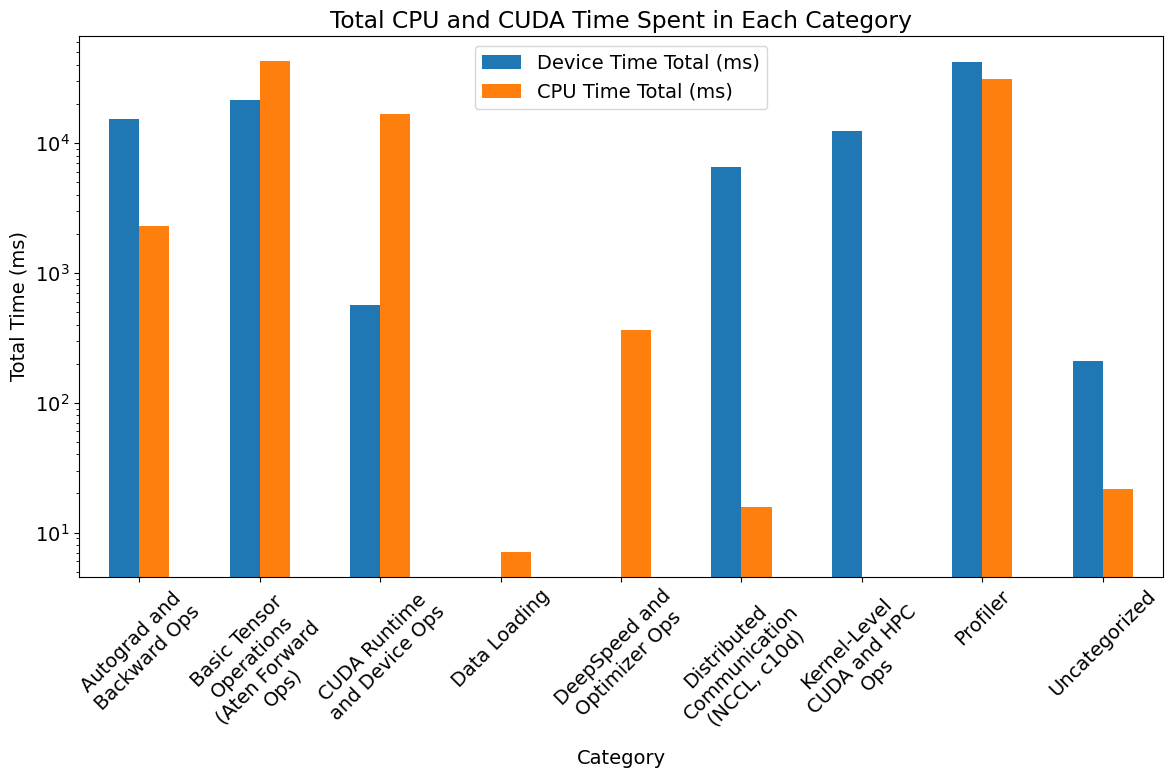

In [38]:


# Define categories and corresponding keywords or patterns
categories = {
    "Data Loading": ["enumerate(DataLoader)", "_MultiProcessingDataLoaderIter.__next__"],
    "Profiler": ["ProfilerStep*"],
    "Basic Tensor Operations (Aten Forward Ops)": [
        "aten::to", "aten::_to_copy", "aten::empty_strided", "aten::copy_", "aten::view", "aten::arange",
        "aten::empty", "aten::resize_", "aten::unsqueeze", "aten::as_strided", "aten::embedding", "aten::reshape",
        "aten::index_select", "aten::add", "aten::dropout", "aten::layer_norm", "aten::native_layer_norm",
        "aten::addmm", "aten::split", "aten::narrow", "aten::slice", "aten::permute",
        "aten::scaled_dot_product_attention", "aten::_scaled_dot_product_efficient_attention", "aten::transpose",
        "aten::_efficient_attention_forward", "aten::mul", "aten::pow", "aten::result_type", "aten::tanh",
        "aten::linear", "aten::t", "aten::matmul", "aten::mm", "aten::_unsafe_view", "aten::contiguous",
        "aten::clone", "aten::empty_like", "aten::cross_entropy_loss", "aten::log_softmax", "aten::_log_softmax",
        "aten::nll_loss_nd", "aten::nll_loss", "aten::nll_loss_forward", "aten::mean", "aten::detach",
        "aten::ones_like", "aten::fill_", "aten::zero_", "aten::zeros", "aten::view_as",
        "aten::_has_compatible_shallow_copy_type", "aten::sum", "aten::add_", "aten::cat",
        "aten::flatten_dense_tensors", "aten::unflatten_dense_tensors", "aten::linalg_vector_norm", "aten::isnan",
        "aten::ne", "aten::isinf", "aten::abs", "aten::eq", "aten::logical_or", "aten::max", "aten::is_nonzero",
        "aten::item", "aten::_local_scalar_dense", "aten::lift_fresh", "aten::detach_", "aten::select", "aten::stack",
        "aten::squeeze", "aten::div", "aten::clamp", "aten::reciprocal", "aten::mul_", "aten::random_",
        "aten::scalar_tensor", "aten::native_dropout", "aten::div_"
    ],
    "Autograd and Backward Ops": [
        "autograd::engine::evaluate_function", "Backward", "_backward", "aten::nll_loss_backward",
        "aten::_log_softmax_backward_data", "aten::slice_backward", "aten::native_layer_norm_backward",
        "aten::tanh_backward", "aten::_scaled_dot_product_efficient_attention_backward",
        "aten::_efficient_attention_backward", "aten::embedding_backward", "aten::embedding_dense_backward"
    ],
    "CUDA Runtime and Device Ops": [
        "cudaMemcpyAsync", "Memcpy HtoD", "cudaStreamSynchronize", "cudaDeviceSynchronize", "cudaLaunchKernel",
        "cudaPointerGetAttributes", "cudaOccupancyMaxActiveBlocksPerMultiprocessorWithFlags", "cudaFuncSetAttribute",
        "cudaStreamIsCapturing", "cudaMemsetAsync", "cudaOccupancyMaxActiveBlocksPerMultiprocessor", "cudaFuncGetAttributes",
        "cudaStreamWaitEvent", "cudaDeviceGetAttribute", "cudaEventRecord", "cudaPeekAtLastError", "cudaEventQuery",
        "cudaStreamGetCaptureInfo_v2", "cudaLaunchKernelExC", "cudaHostAlloc", "cudaFree", "cudaMalloc", "Memcpy DtoH",
        "Memcpy Pageable -> Device"
    ],
    "Distributed Communication (NCCL, c10d)": [
        "c10d::allreduce_", "nccl:all_reduce", "ncclDevKernel_AllReduce_Sum", "nccl:_all_gather_base",
        "ncclDevKernel_AllGather", "record_param_comms", "c10d::_allgather_base_"
    ],
    "DeepSpeed and Optimizer Ops": ["Optimizer.step#DeepSpeedCPUAdam.step"],
    "Kernel-Level CUDA and HPC Ops": [
        "cutlass", "void at::native::", "elementwise_kernel", "vectorized_elementwise_kernel", "reduce_kernel",
        "ampere_sgemm", "fmha_cutlass", "at_cuda_detail::cub"
    ]
}

# Function to classify based on keywords
def classify_function(name):
    for category, keywords in categories.items():
        if any(keyword in name for keyword in keywords):
            return category
    return "Uncategorized"

# Apply classification
data['Category'] = data['Name'].apply(classify_function)

# Save the categorized data to a new CSV
output_path = './catagorized_wandb/categorized_deepspeed_2GPU_zero2.csv'
# data.to_csv(output_path, index=False)

print(output_path)

# Count total CUDA and CPU time spent in each category
category_times = data.groupby('Category')[['Device Time Total (ms)', 'CPU Time Total (ms)']].sum()
category_times

# Plot the total time spent in each category, log-log scale, each class with two bars for CPU and CUDA time, the catagory name on x axis is wrapped to avoid overlap
fig, ax = plt.subplots(figsize=(12, 8))
category_times.plot(kind='bar', ax=ax, log=True)
ax.set_xticklabels([textwrap.fill(text, 15) for text in category_times.index], rotation=45, ha='center')
ax.set_xlabel('Category')
ax.set_ylabel('Total Time (ms)')
ax.set_title('Total CPU and CUDA Time Spent in Each Category')
plt.tight_layout()
# Set font to a larger size
plt.rcParams.update({'font.size': 16})

plt.show()


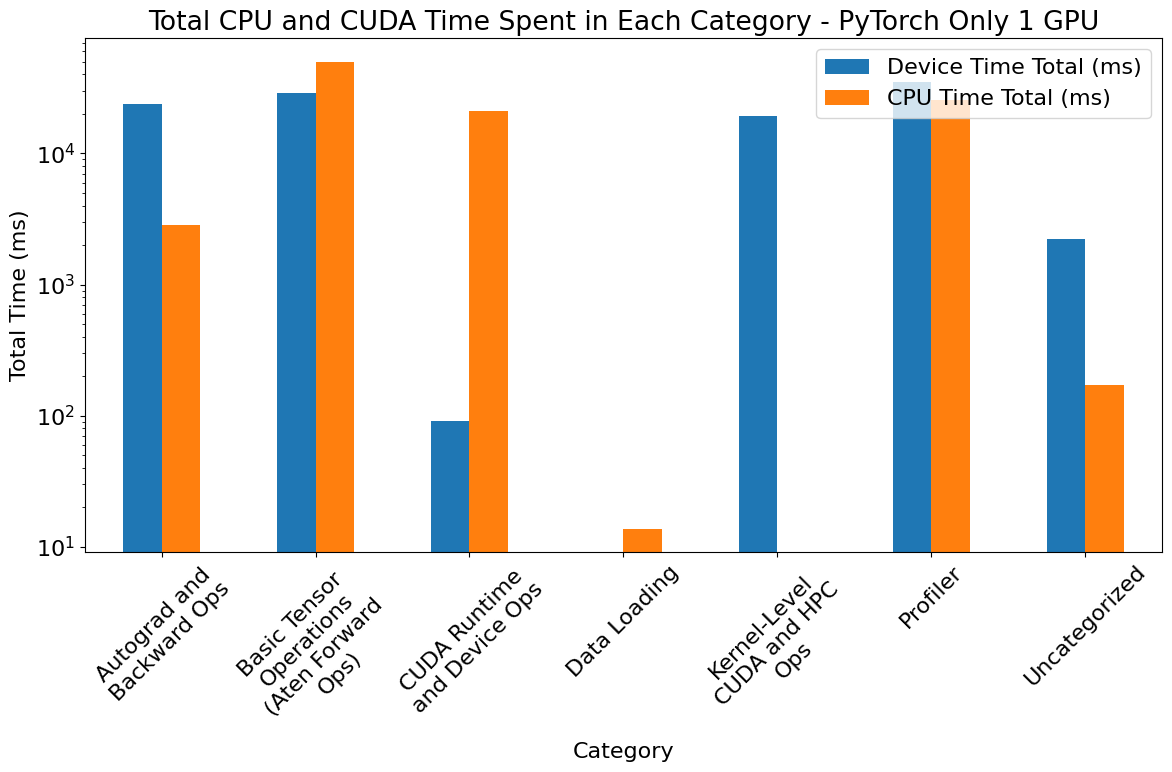

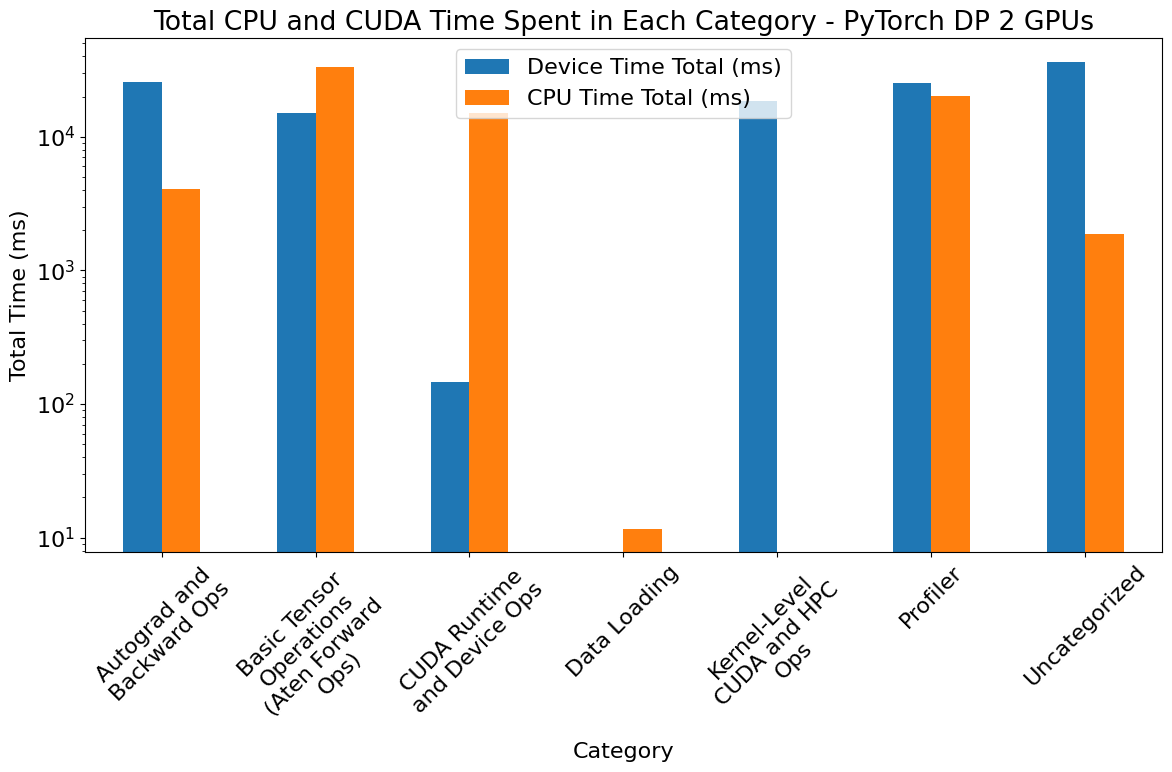

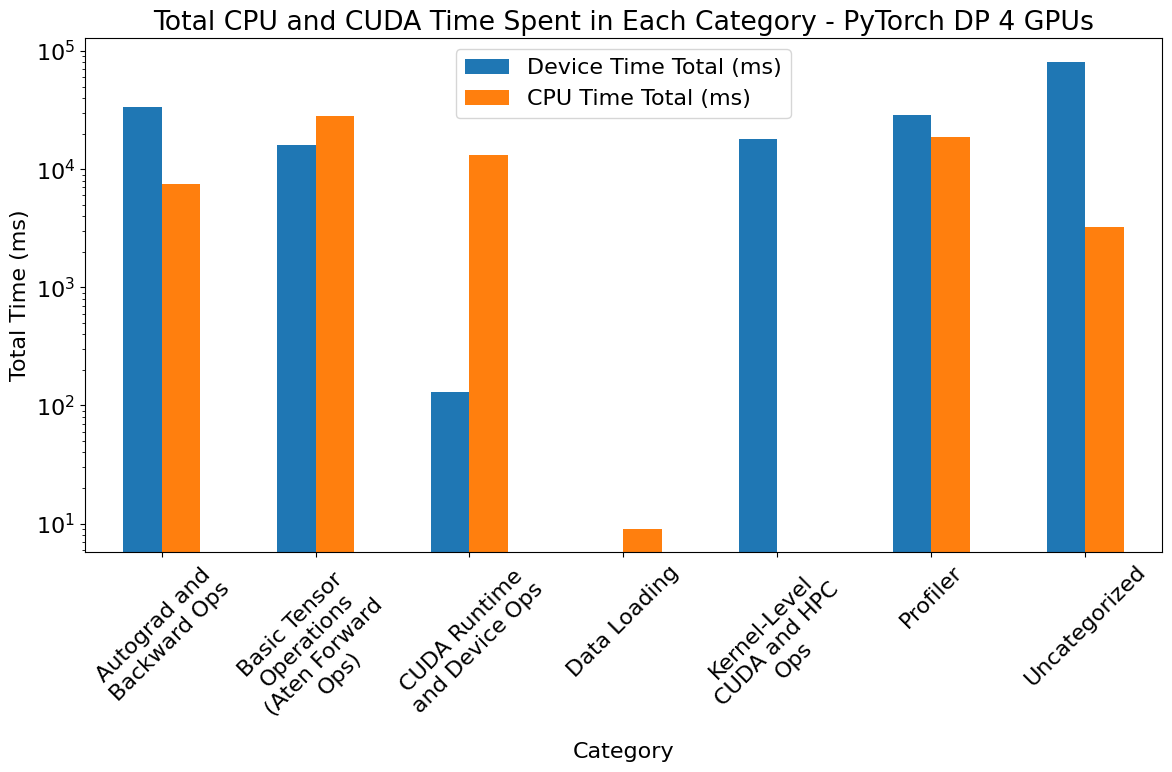

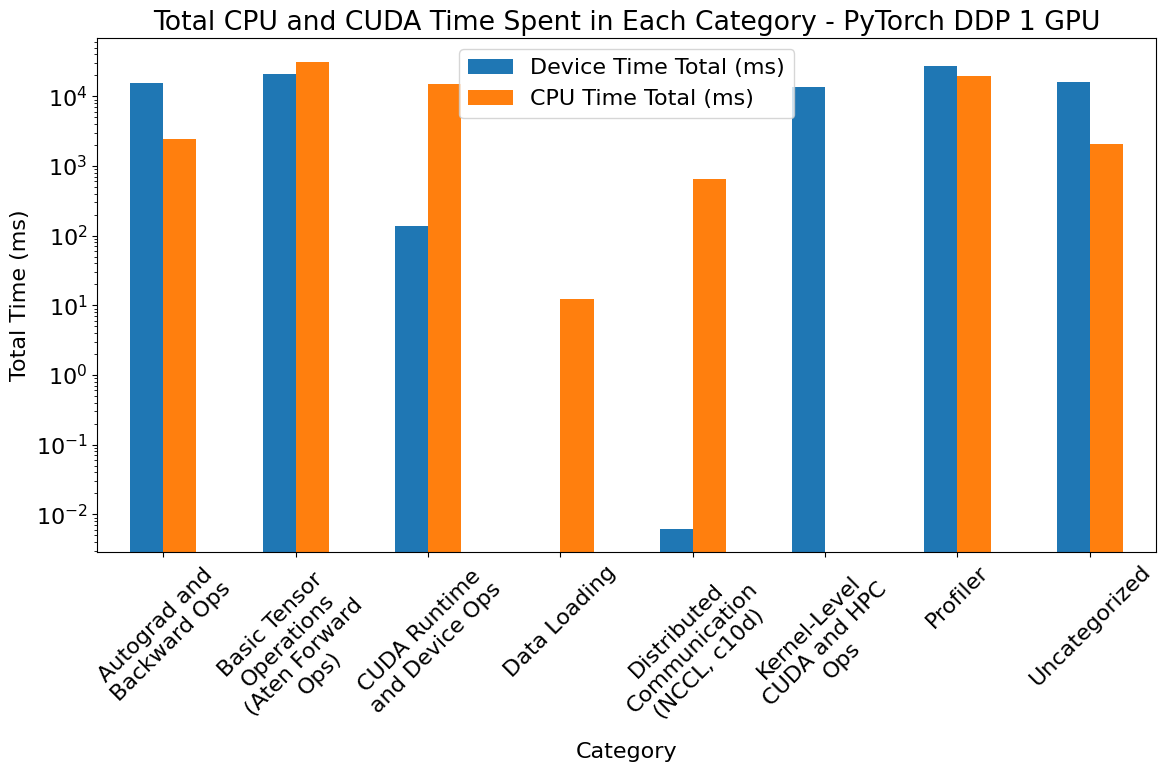

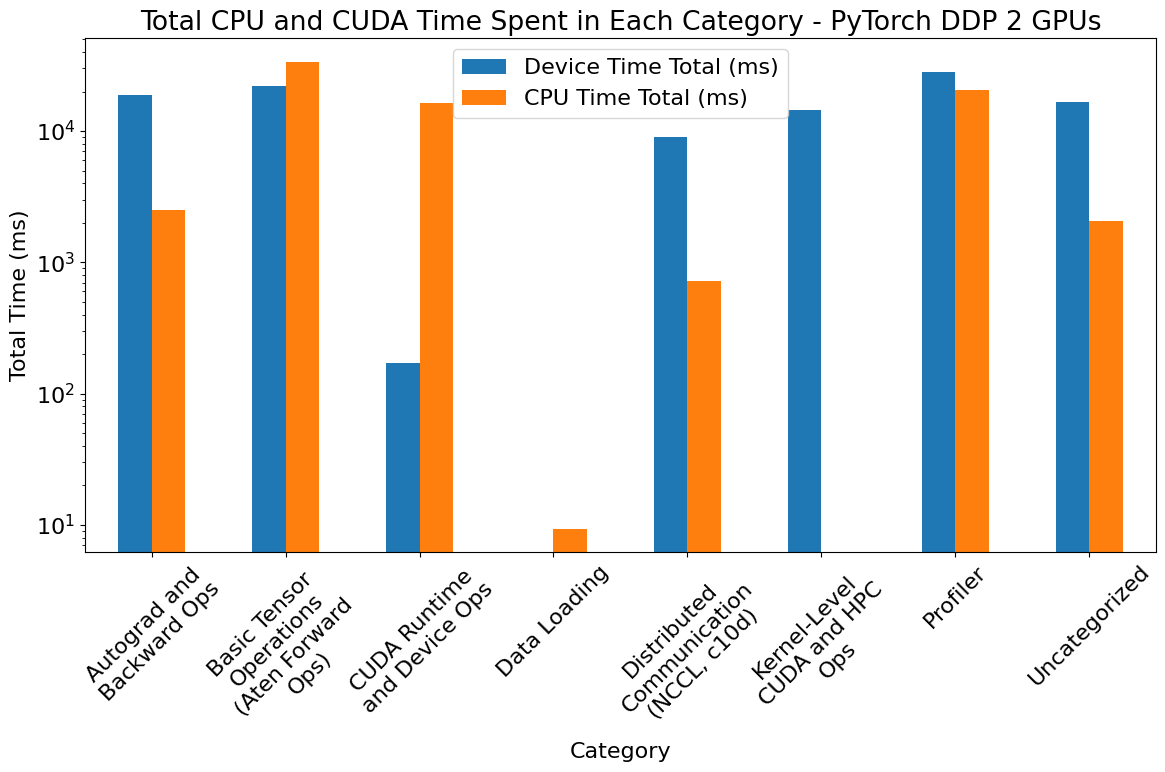

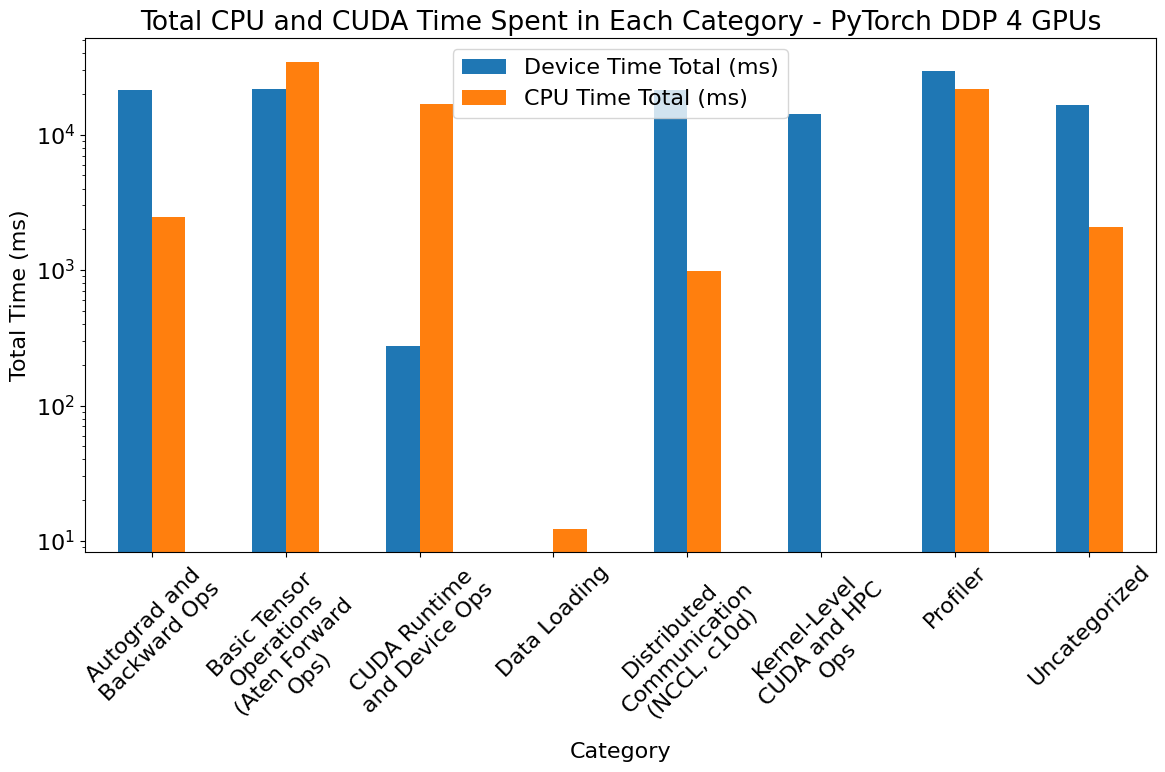

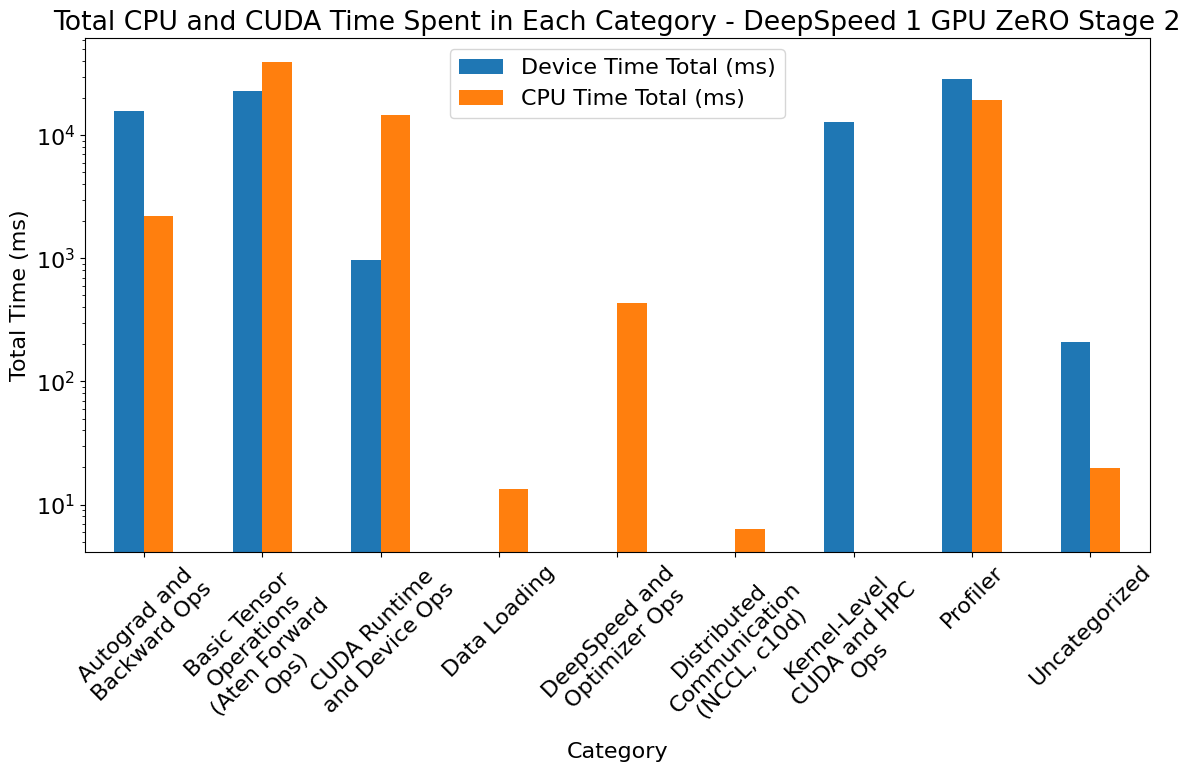

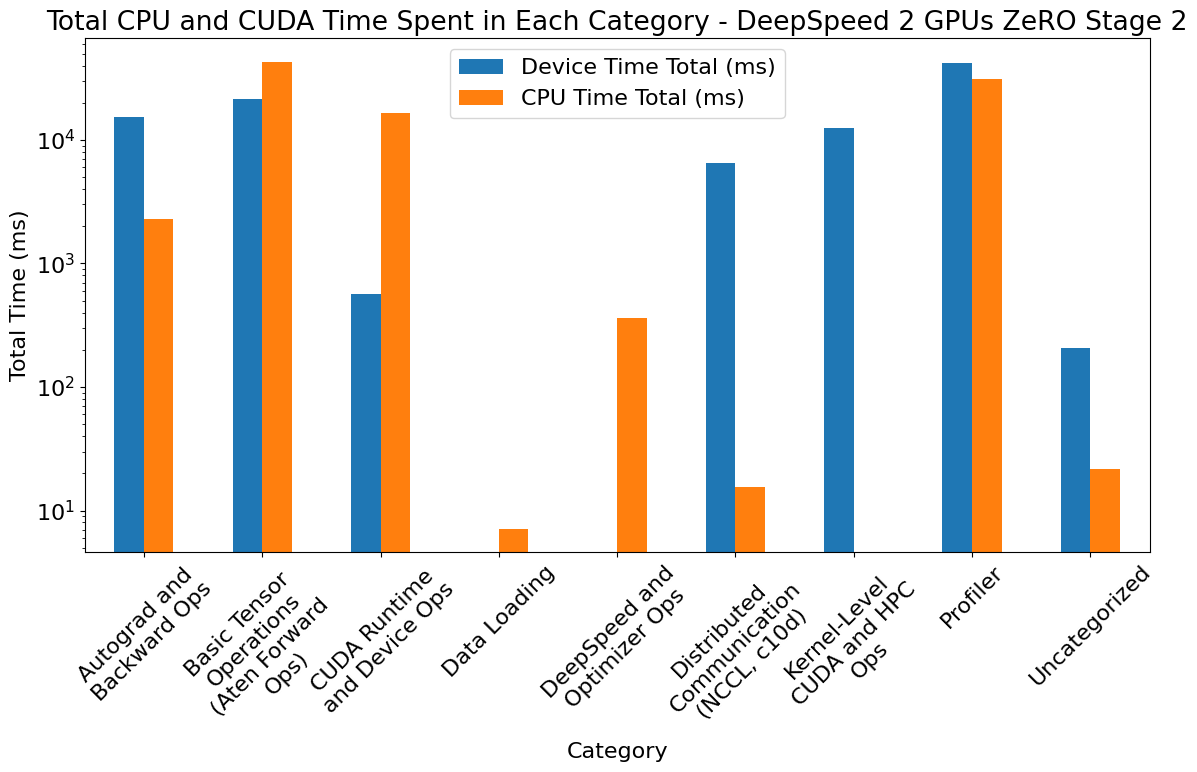

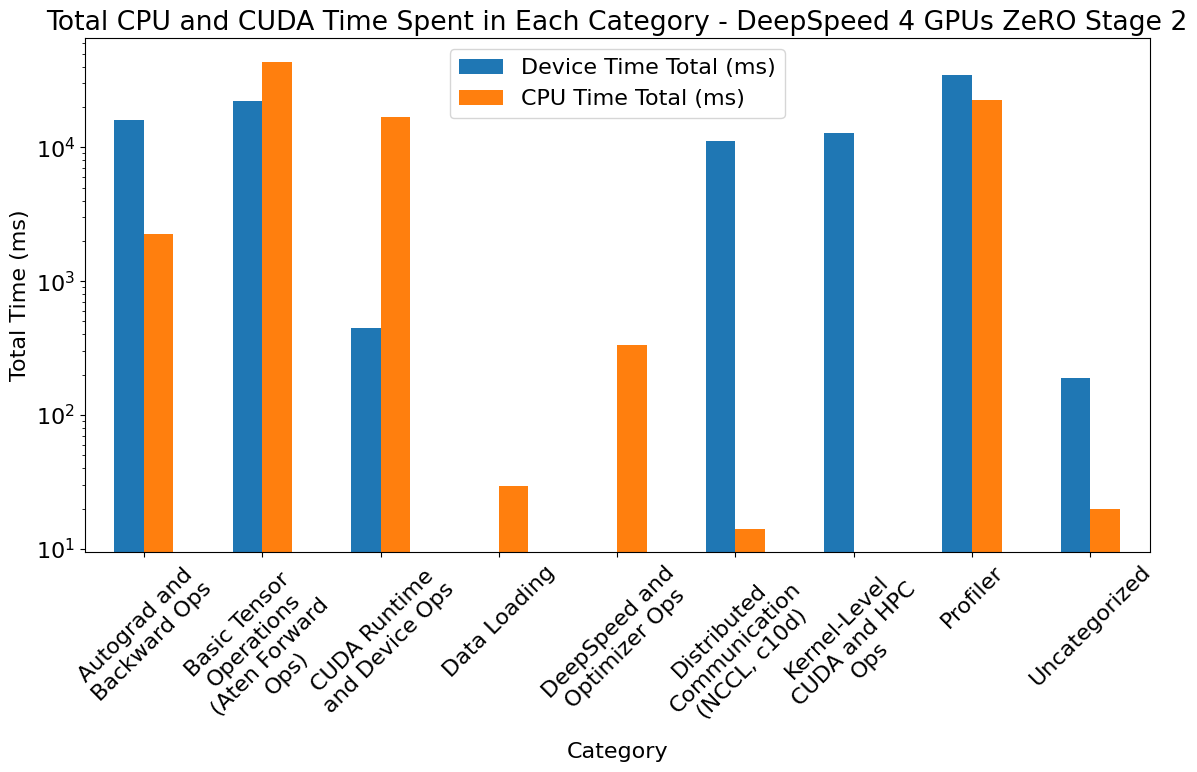

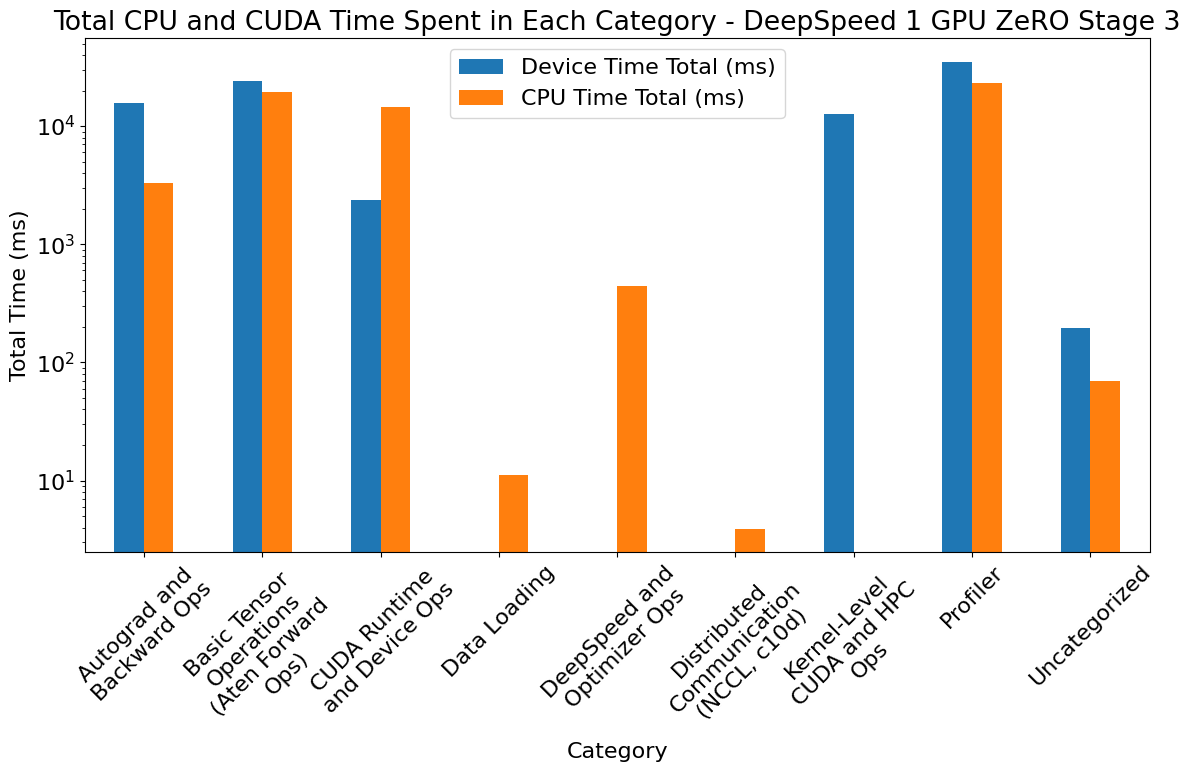

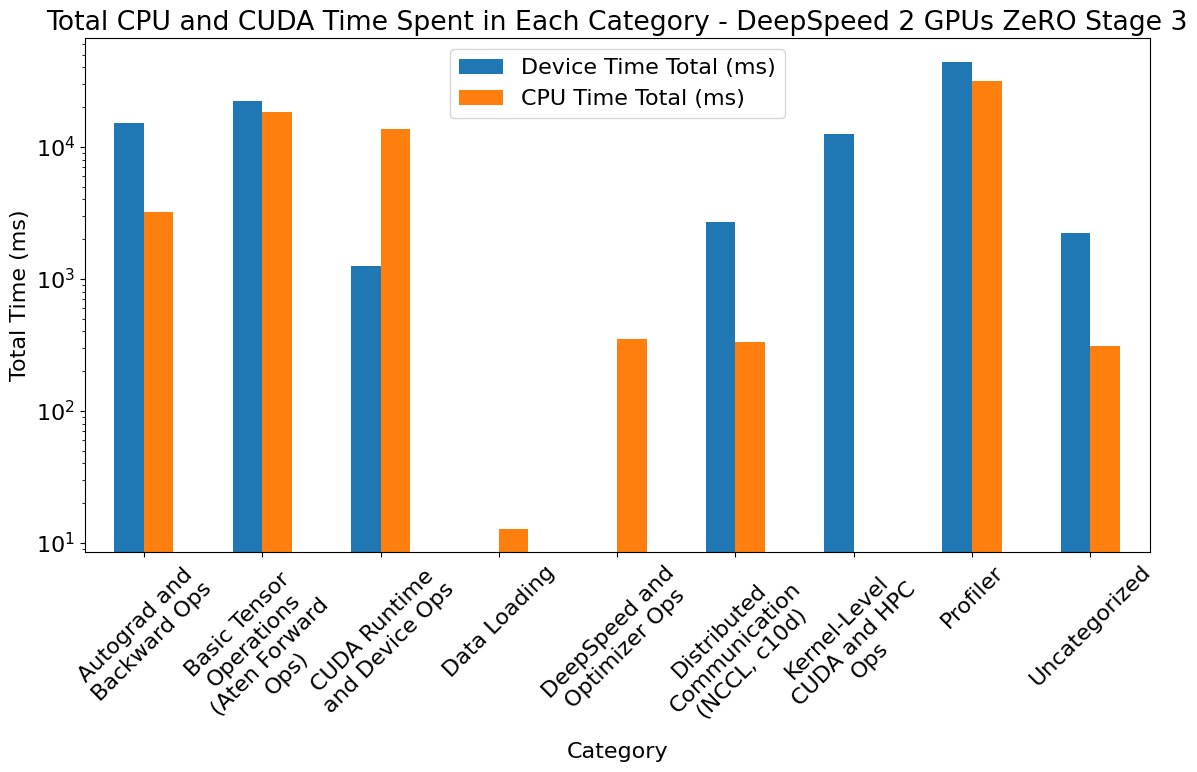

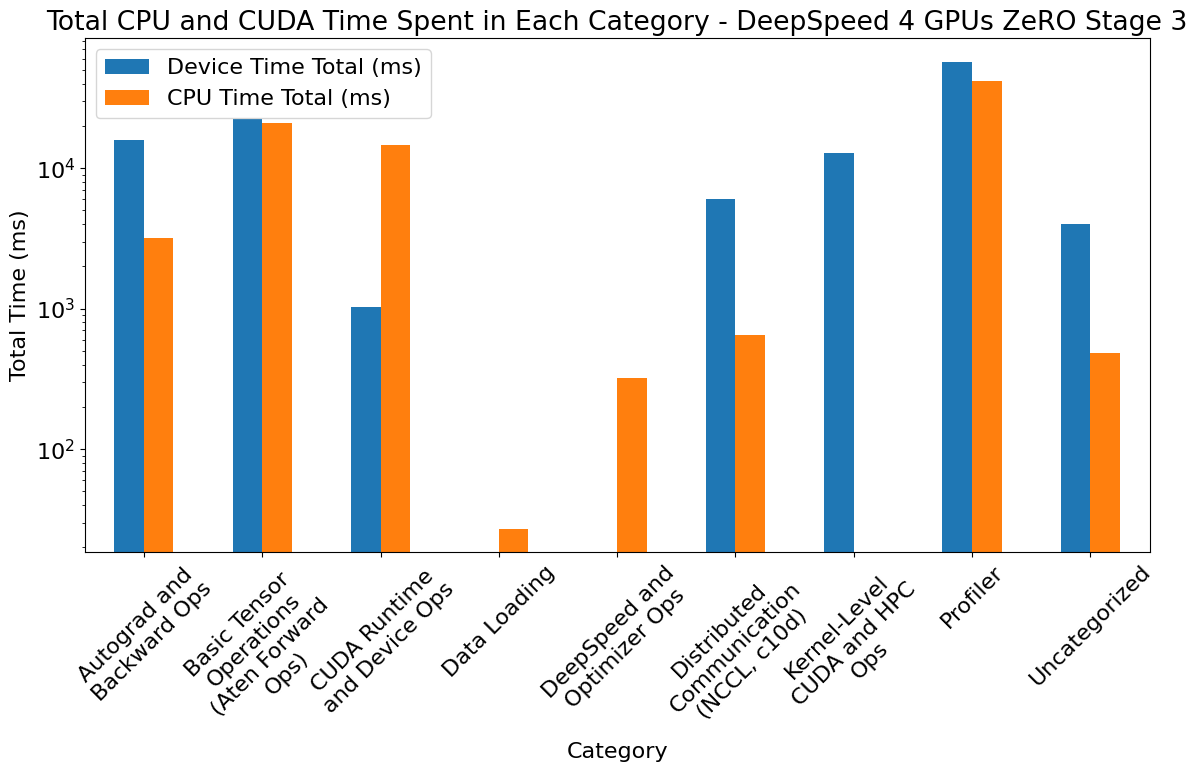

In [39]:
import os

# File paths for all 12 runs
# wandb\wandb_export_2024-12-10T17_17_56.804-05_00-pytorch-1GPU.csv
# wandb\wandb_export_2024-12-10T17_19_32.285-05_00-DP-2GPU.csv
# wandb\wandb_export_2024-12-10T17_19_54.712-05_00-DP-4GPU.csv
# wandb\wandb_export_2024-12-10T17_20_13.028-05_00-DDP-1GPU.csv
# wandb\wandb_export_2024-12-10T17_20_39.123-05_00-DDP-2GPU.csv
# wandb\wandb_export_2024-12-10T17_20_52.951-05_00-DDP-4GPU.csv
# wandb\wandb_export_2024-12-10T17_21_18.306-05_00-deepspeed-1GPU-zero2.csv
# wandb\wandb_export_2024-12-10T17_21_47.538-05_00-deepspeed-2GPU-zero2.csv
# wandb\wandb_export_2024-12-10T17_22_01.688-05_00-deepspeed-4GPU-zero2.csv
# wandb\wandb_export_2024-12-10T17_33_27.500-05_00-deepspeed-1GPU-zero3.csv
# wandb\wandb_export_2024-12-10T17_36_11.561-05_00-deepspeed-2GPU-zero3.csv
# wandb\wandb_export_2024-12-10T17_36_57.711-05_00-deepspeed-4GPU-zero3.csv

# Load all CSV files from the directory
path_prefix = './wandb/'
name_postfix = 'Total CPU and CUDA Time'
run_name_file_path_mapping = {'PyTorch Only 1 GPU': './wandb/wandb_export_2024-12-10T17_17_56.804-05_00-pytorch-1GPU.csv',
                              'PyTorch DP 2 GPUs': './wandb/wandb_export_2024-12-10T17_19_32.285-05_00-DP-2GPU.csv',
                              'PyTorch DP 4 GPUs': './wandb/wandb_export_2024-12-10T17_19_54.712-05_00-DP-4GPU.csv',
                              'PyTorch DDP 1 GPU': './wandb/wandb_export_2024-12-10T17_20_13.028-05_00-DDP-1GPU.csv',
                              'PyTorch DDP 2 GPUs': './wandb/wandb_export_2024-12-10T17_20_39.123-05_00-DDP-2GPU.csv',
                              'PyTorch DDP 4 GPUs': './wandb/wandb_export_2024-12-10T17_20_52.951-05_00-DDP-4GPU.csv',
                              'DeepSpeed 1 GPU ZeRO Stage 2': './wandb/wandb_export_2024-12-10T17_21_18.306-05_00-deepspeed-1GPU-zero2.csv',
                              'DeepSpeed 2 GPUs ZeRO Stage 2': './wandb/wandb_export_2024-12-10T17_21_47.538-05_00-deepspeed-2GPU-zero2.csv',
                              'DeepSpeed 4 GPUs ZeRO Stage 2': './wandb/wandb_export_2024-12-10T17_22_01.688-05_00-deepspeed-4GPU-zero2.csv',
                              'DeepSpeed 1 GPU ZeRO Stage 3': './wandb/wandb_export_2024-12-10T17_33_27.500-05_00-deepspeed-1GPU-zero3.csv',
                              'DeepSpeed 2 GPUs ZeRO Stage 3': './wandb/wandb_export_2024-12-10T17_36_11.561-05_00-deepspeed-2GPU-zero3.csv',
                              'DeepSpeed 4 GPUs ZeRO Stage 3': './wandb/wandb_export_2024-12-10T17_36_57.711-05_00-deepspeed-4GPU-zero3.csv'}
csv_files = {run_name: pd.read_csv(file_path) for run_name, file_path in run_name_file_path_mapping.items()}

# Perform the same visualization on all 12 runs
# Keep those catagories that do not exist in any of the runs in the chart
for run_name, data in csv_files.items():
    data['Category'] = data['Name'].apply(classify_function)
    category_times = data.groupby('Category')[['Device Time Total (ms)', 'CPU Time Total (ms)']].sum()
    fig, ax = plt.subplots(figsize=(12, 8))
    category_times.plot(kind='bar', ax=ax, log=True)
    ax.set_xticklabels([textwrap.fill(text, 15) for text in category_times.index], rotation=45, ha='center')
    ax.set_xlabel('Category')
    ax.set_ylabel('Total Time (ms)')
    ax.set_title(f'Total CPU and CUDA Time Spent in Each Category - {run_name}')
    plt.tight_layout()
    plt.rcParams.update({'font.size': 16})
    plt.show()


In [40]:
# Row: Run Name, Column: Category, Value: Total Time (ms)
category_times = {run_name: data.groupby('Category')[['Device Time Total (ms)', 'CPU Time Total (ms)']].sum()
                  for run_name, data in csv_files.items()}
category_times_df = pd.concat(category_times, axis=1)
category_times_df.columns.names = ['Run Name', 'Metric']
category_times_df

Run Name                                       PyTorch Only 1 GPU  \
Metric                                     Device Time Total (ms)   
Category                                                            
Autograd and Backward Ops                            23760.591669   
Basic Tensor Operations (Aten Forward Ops)           29074.006323   
CUDA Runtime and Device Ops                             91.702046   
Data Loading                                             0.000000   
Kernel-Level CUDA and HPC Ops                        19197.949373   
Profiler                                             35226.202388   
Uncategorized                                         2220.509986   
Distributed Communication (NCCL, c10d)                        NaN   
DeepSpeed and Optimizer Ops                                   NaN   

Run Name                                                        \
Metric                                     CPU Time Total (ms)   
Category                                                         
Autograd and Backward Ops                          2846.565544   
Basic Tensor Operations (Aten Forward Ops)        50074.580821   
CUDA Runtime and Device Ops                       21217.759625   
Data Loading                                         13.629213   
Kernel-Level CUDA and HPC Ops                         0.000000   
Profiler                                          25612.431311   
Uncategorized                                       170.236892   
Distributed Communication (NCCL, c10d)                     NaN   
DeepSpeed and Optimizer Ops                                NaN   

Run Name                                        PyTorch DP 2 GPUs  \
Metric                                     Device Time Total (ms)   
Category                                                            
Autograd and Backward Ops                            25559.916065   
Basic Tensor Operations (Aten Forward Ops)           15055.456789   
CUDA Runtime and Device Ops                            145.796379   
Data Loading                                             0.000000   
Kernel-Level CUDA and HPC Ops                        18580.774902   
Profiler                                             25050.393897   
Uncategorized                                        36455.203523   
Distributed Communication (NCCL, c10d)                        NaN   
DeepSpeed and Optimizer Ops                                   NaN   

Run Name                                                        \
Metric                                     CPU Time Total (ms)   
Category                                                         
Autograd and Backward Ops                          4080.966997   
Basic Tensor Operations (Aten Forward Ops)        33253.684534   
CUDA Runtime and Device Ops                       15026.678229   
Data Loading                                         11.600007   
Kernel-Level CUDA and HPC Ops                         0.000000   
Profiler                                          20090.089912   
Uncategorized                                      1883.466956   
Distributed Communication (NCCL, c10d)                     NaN   
DeepSpeed and Optimizer Ops                                NaN   

Run Name                                        PyTorch DP 4 GPUs  \
Metric                                     Device Time Total (ms)   
Category                                                            
Autograd and Backward Ops                            33636.047064   
Basic Tensor Operations (Aten Forward Ops)           16119.422328   
CUDA Runtime and Device Ops                            129.520758   
Data Loading                                             0.000000   
Kernel-Level CUDA and HPC Ops                        17999.690030   
Profiler                                             28686.506780   
Uncategorized                                        81200.225747   
Distributed Communication (NCCL, c10d)                        NaN 

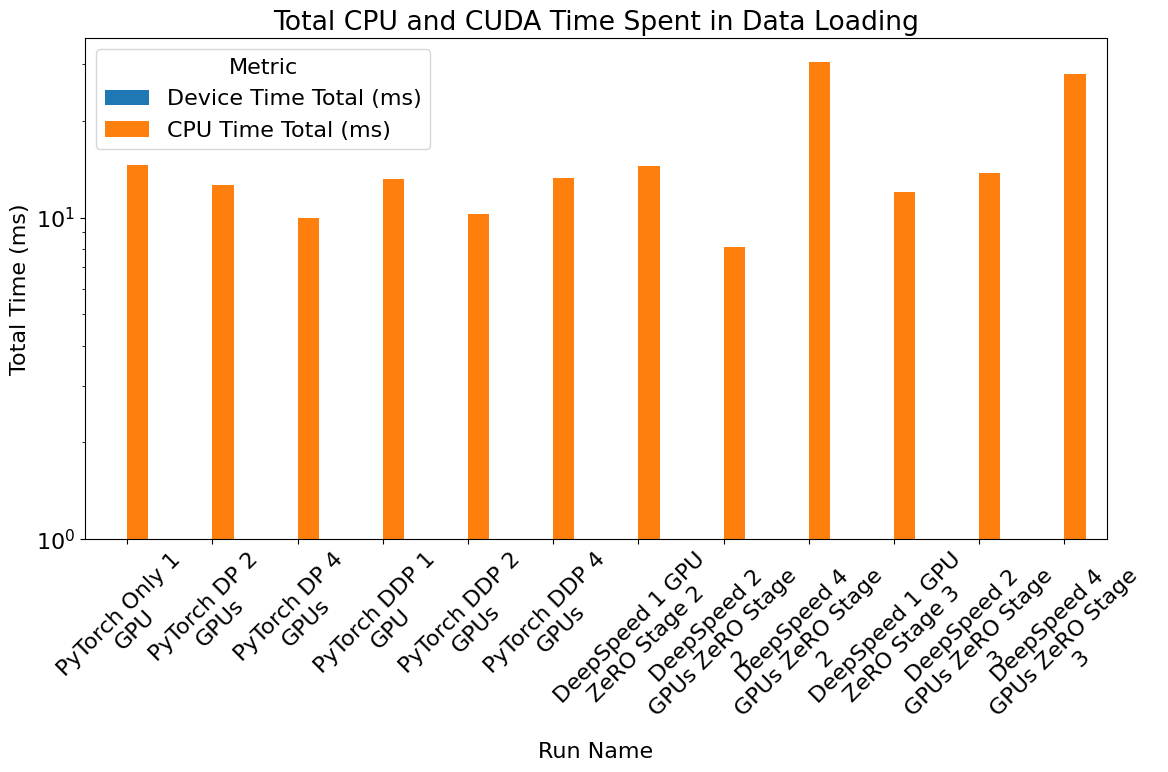

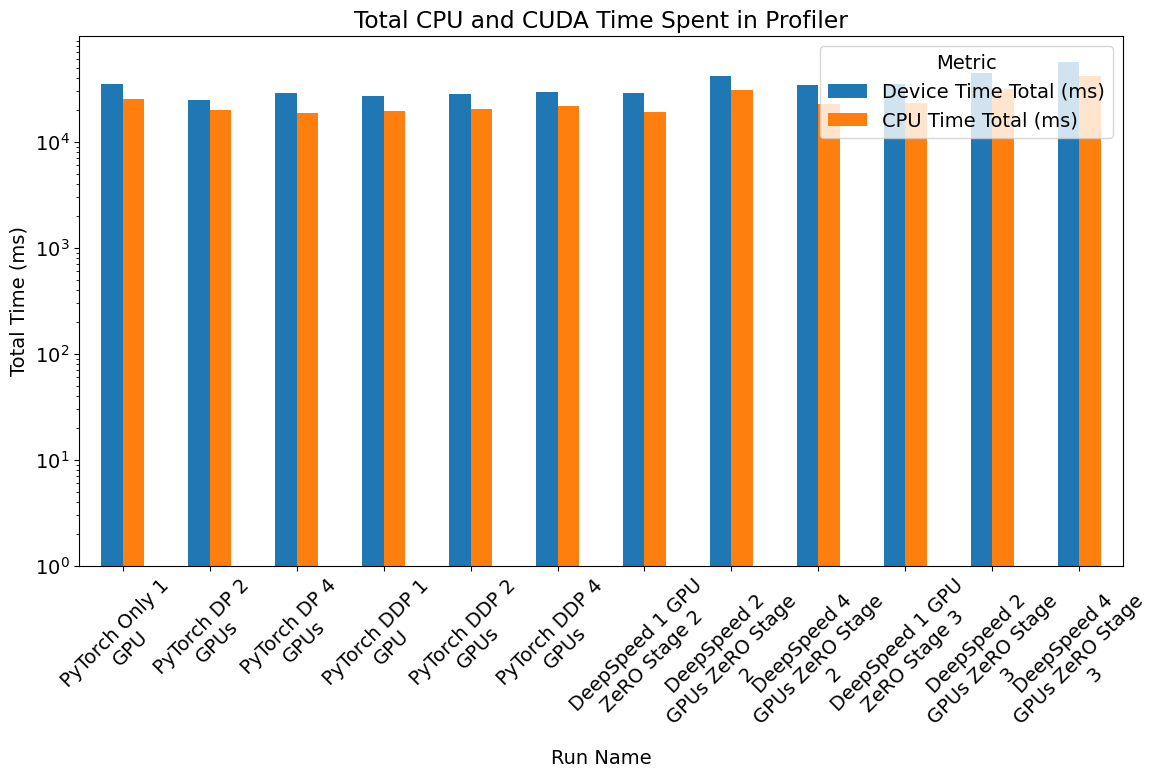

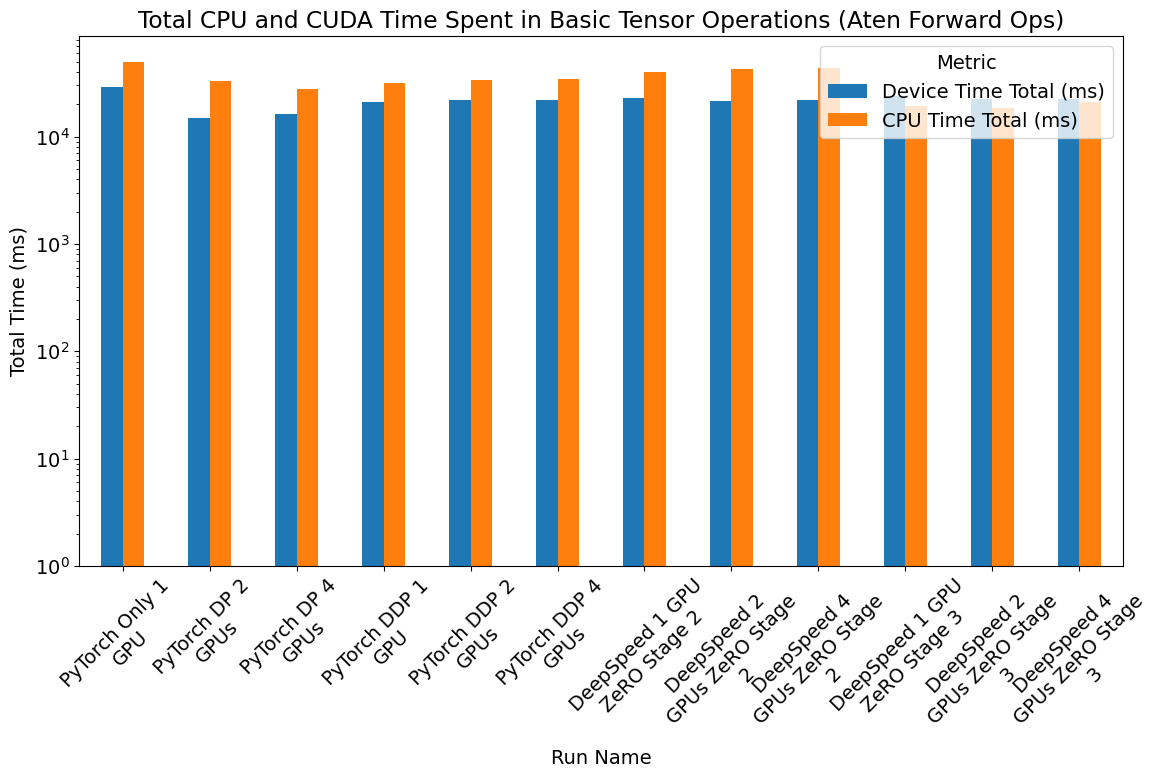

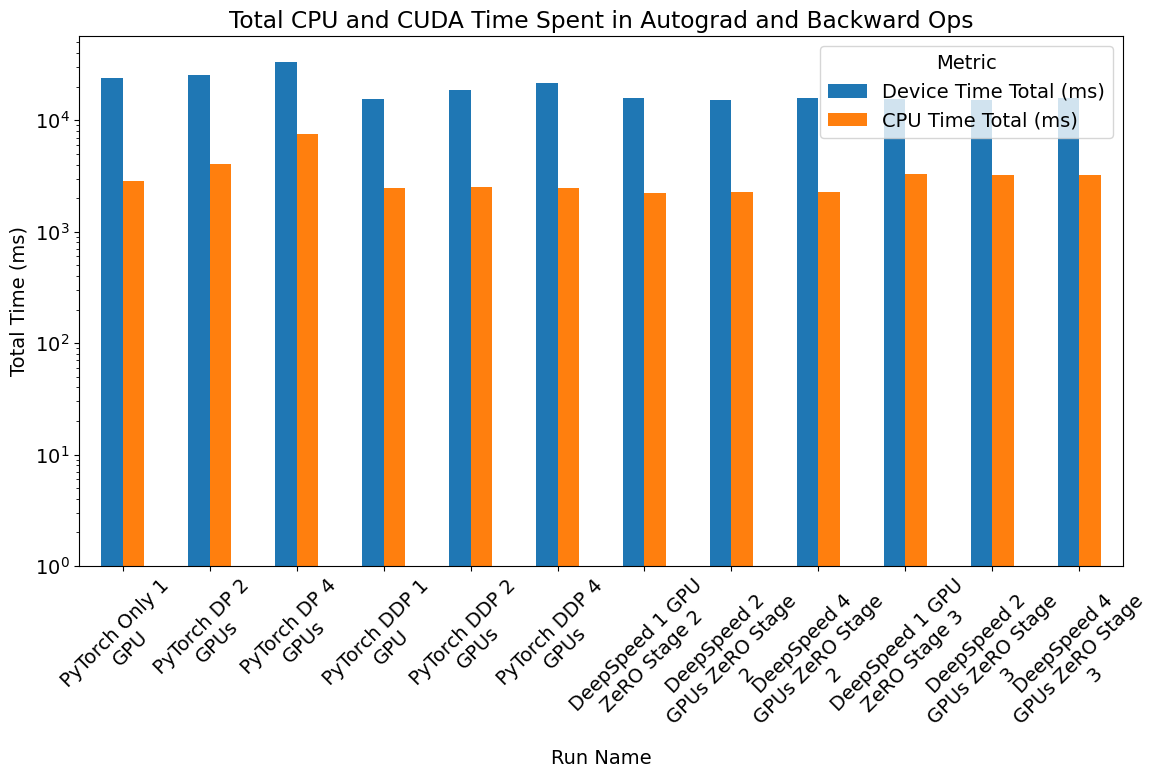

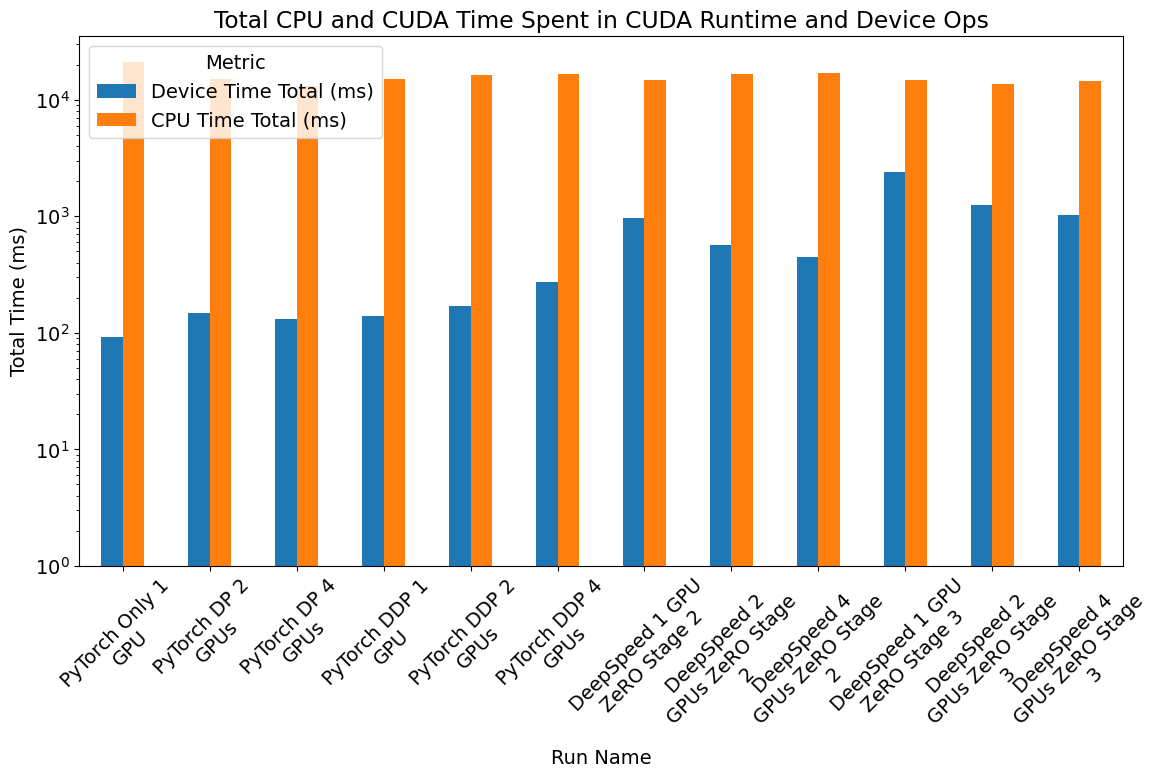

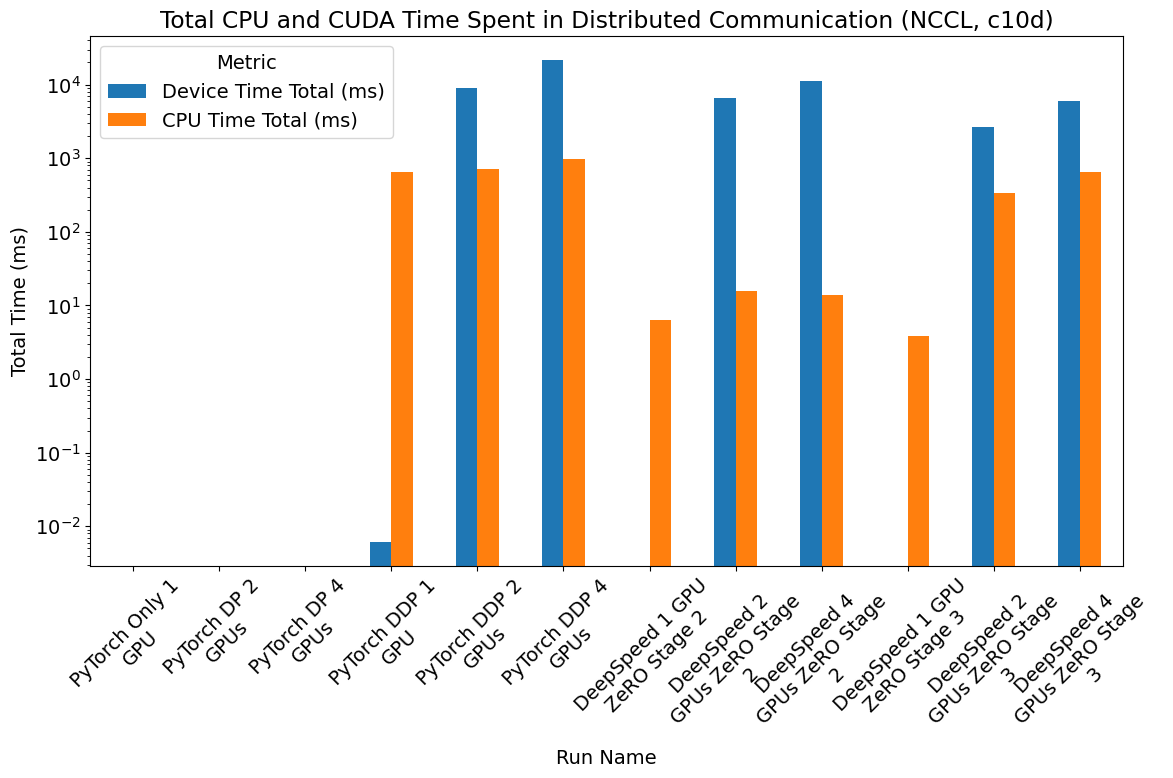

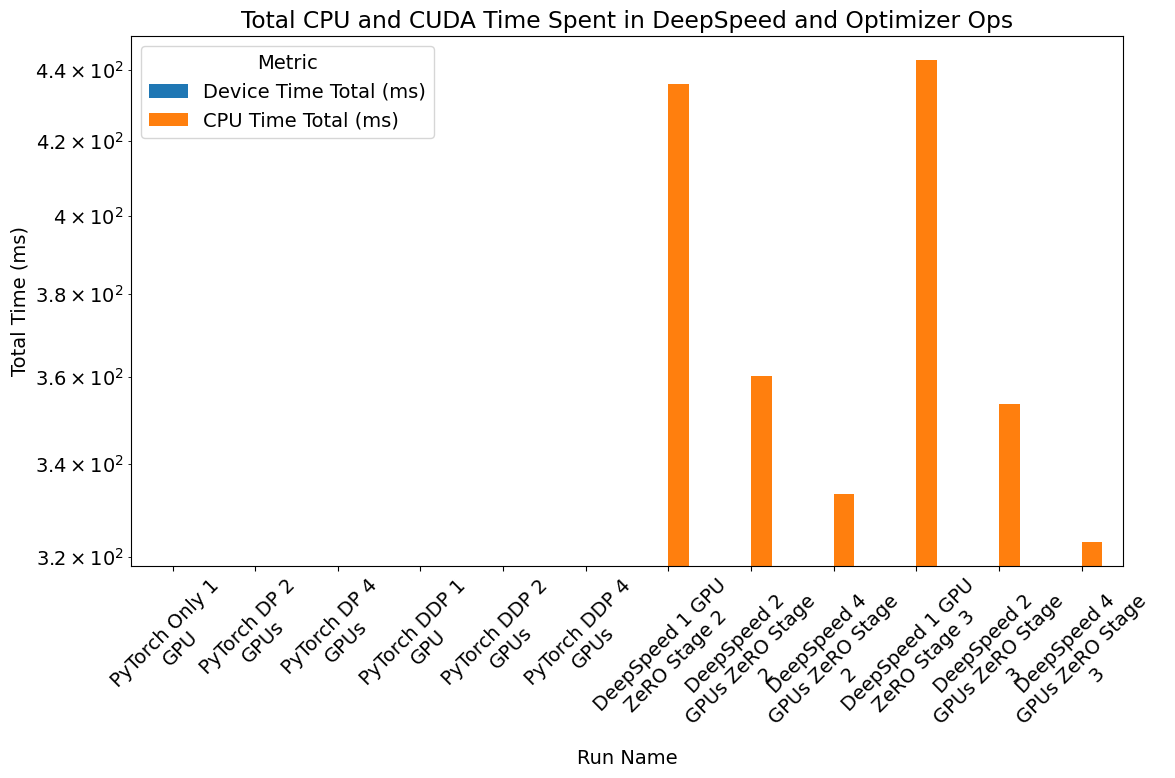

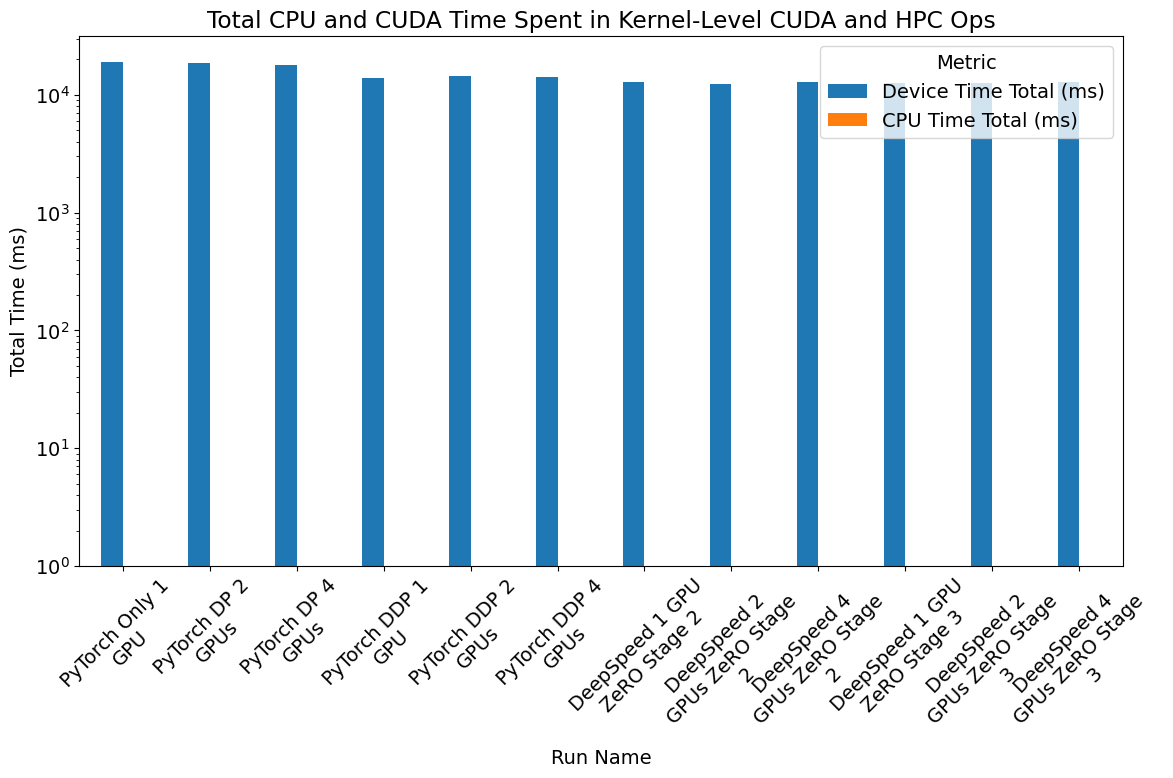

In [41]:
# Keep those categories that do not exist in any of the runs out of the chart 
# Generate 9 plots, one for each category; each plot with all runs that contains this category, showing the Device time total and CPU time total in two separate bars
for category in categories.keys():
    if category not in category_times_df.index:
        continue
    fig, ax = plt.subplots(figsize=(12, 8))
    category_data = category_times_df.loc[category].unstack()
    category_data.plot(kind='bar', ax=ax, log=True)
    ax.set_xticks(range(len(category_data.index)))
    ax.set_xticklabels([textwrap.fill(text, 15) for text in category_data.index], rotation=45, ha='center')
    ax.set_xlabel('Run Name')
    ax.set_ylabel('Total Time (ms)')
    ax.set_title(f'Total CPU and CUDA Time Spent in {category}')
    plt.tight_layout()
    plt.rcParams.update({'font.size': 14})
    plt.show()


                    Device Time Total (ms)  CPU Time Total (ms)
Run Name                                                       
PyTorch Only 1 GPU           109570.961785         99935.203406
PyTorch DP 2 GPUs            120847.541555         74346.486635
PyTorch DP 4 GPUs            177771.412707         70517.728609
PyTorch DDP 1 GPU             93714.063130         71385.114896
PyTorch DDP 2 GPUs           109376.302799         75949.290325


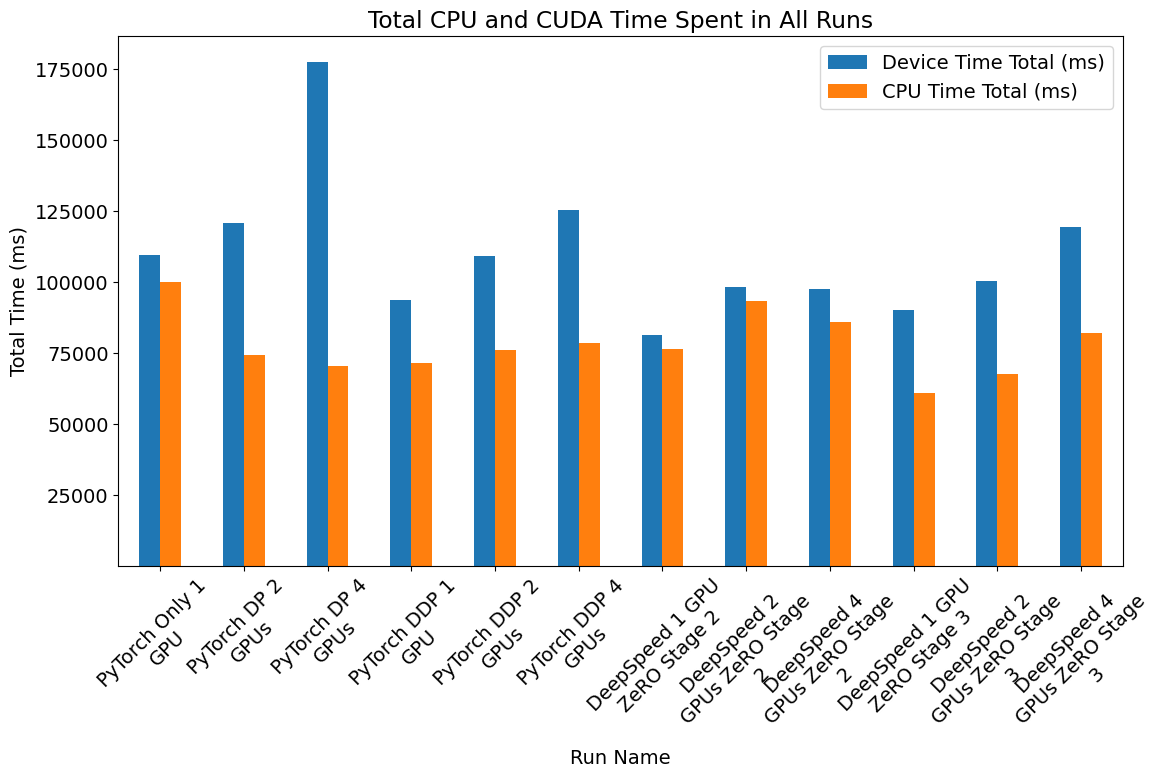

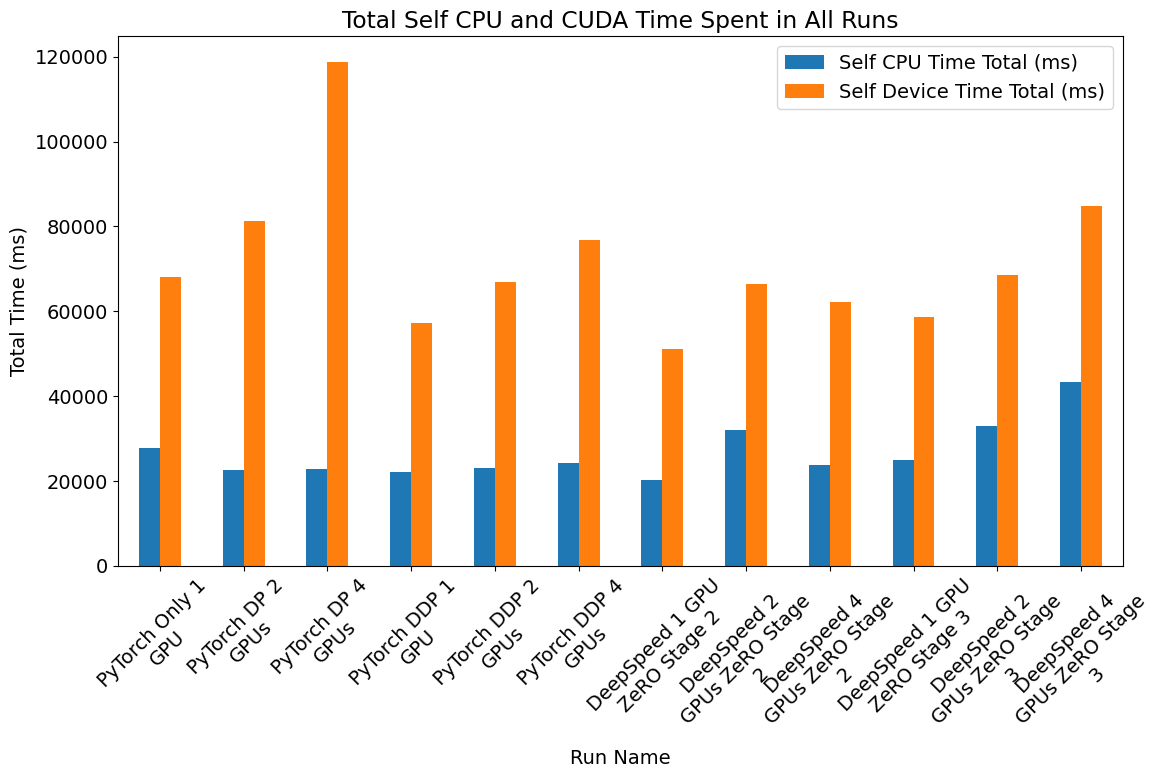

In [42]:
# Aggregate the total time spent in  ['Device Time Total (ms)', 'CPU Time Total (ms)'] for all runs
total_times = {run_name: data[['Device Time Total (ms)', 'CPU Time Total (ms)']].sum()
               for run_name, data in csv_files.items()}
total_times_df = pd.DataFrame(total_times).T
total_times_df.index.name = 'Run Name'
print(total_times_df.head())


plt.rcParams.update({'font.size': 14})

# Visualize the total time spent in ['Device Time Total (ms)', 'CPU Time Total (ms)'] for all runs
fig, ax = plt.subplots(figsize=(12, 8))
# Add a warped x-axis to avoid overlap
total_times_df.index = [textwrap.fill(text, 15) for text in total_times_df.index]
total_times_df.plot(kind='bar', ax=ax, log=True, rot=45)
ax.set_xlabel('Run Name')
ax.set_ylabel('Total Time (ms)')
ax.set_title('Total CPU and CUDA Time Spent in All Runs')
# Not Log scale for y-axis
plt.yscale('linear')
plt.tight_layout()
plt.show()


# Aggregate the Self CPU time total and Self CUDA time total for all runs
self_times = {run_name: data[['Self CPU Time Total (ms)', 'Self Device Time Total (ms)']].sum()
              for run_name, data in csv_files.items()}
self_times_df = pd.DataFrame(self_times).T
self_times_df.index.name = 'Run Name'
self_times_df

# Visualize the Self CPU time total and Self CUDA time total for all runs
fig, ax = plt.subplots(figsize=(12, 8))
# Add a warped x-axis to avoid overlap
self_times_df.index = [textwrap.fill(text, 15) for text in self_times_df.index]
self_times_df.plot(kind='bar', ax=ax, rot=45)
ax.set_xlabel('Run Name')
ax.set_ylabel('Total Time (ms)')
ax.set_title('Total Self CPU and CUDA Time Spent in All Runs')
plt.tight_layout()
plt.show()



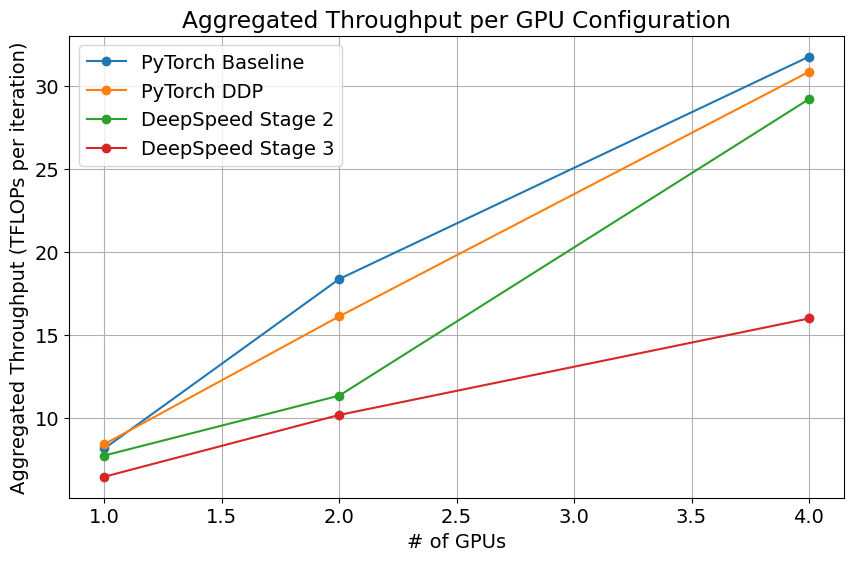

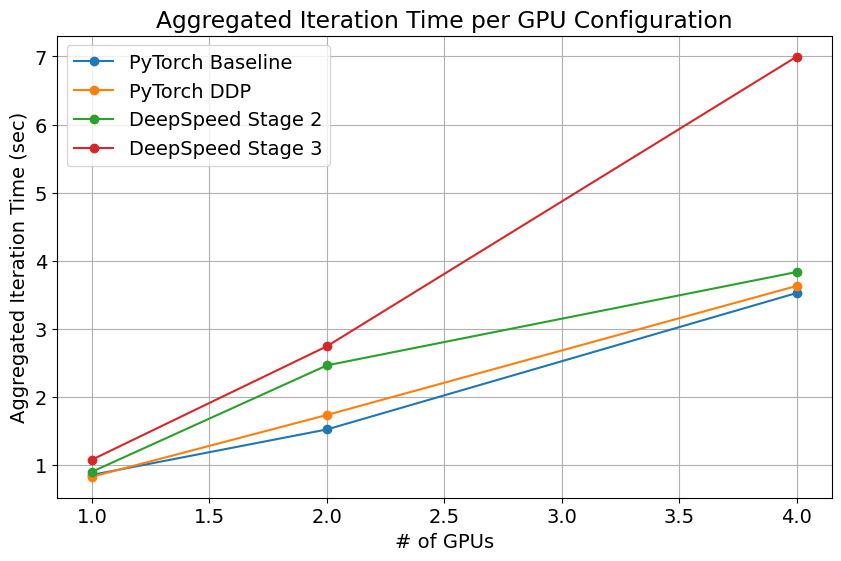

In [43]:
# Data preparation: Aggregating throughput and iteration time for all GPUs in each configuration
throughput_aggregated = {
    "PyTorch Baseline": [8.1849, 9.1924 + 9.1924, 7.9414 + 7.9414 + 7.9414 + 7.9414],
    "PyTorch DDP": [8.4467, 8.0681 + 8.0681, 7.7143 + 7.7143 + 7.7143 + 7.7143],
    "DeepSpeed Stage 2": [7.7618, 5.6882 + 5.6775, 7.2950 + 7.3213 + 7.2715 + 7.3236],
    "DeepSpeed Stage 3": [6.4852, 5.1064 + 5.0972, 4.0075 + 3.9970 + 4.0055 + 3.9997]
}

iteration_time_aggregated = {
    "PyTorch Baseline": [0.8552, 0.7614 + 0.7614, 0.8814 + 0.8814 + 0.8814 + 0.8814],
    "PyTorch DDP": [0.8287, 0.8676 + 0.8676, 0.9073 + 0.9073 + 0.9073 + 0.9073],
    "DeepSpeed Stage 2": [0.9018, 1.2305 + 1.2329, 0.9595 + 0.9561 + 0.9626 + 0.9557],
    "DeepSpeed Stage 3": [1.0793, 1.3707 + 1.3732, 1.7466 + 1.7512 + 1.7475 + 1.7500]
}

plt.rcParams.update({'font.size': 14})

# Aggregated Throughput Visualization
x_labels = [1, 2, 4]
plt.figure(figsize=(10, 6))
for label, data in throughput_aggregated.items():
    plt.plot(x_labels, data, marker='o', label=label)
plt.xlabel("# of GPUs")
plt.ylabel("Aggregated Throughput (TFLOPs per iteration)")
plt.title("Aggregated Throughput per GPU Configuration")
plt.legend()
plt.grid()
plt.show()

# Aggregated Iteration Time Visualization
plt.figure(figsize=(10, 6))
for label, data in iteration_time_aggregated.items():
    plt.plot(x_labels, data, marker='o', label=label)

plt.xlabel("# of GPUs")
plt.ylabel("Aggregated Iteration Time (sec)")
plt.title("Aggregated Iteration Time per GPU Configuration")
plt.legend()
plt.grid()
plt.show()

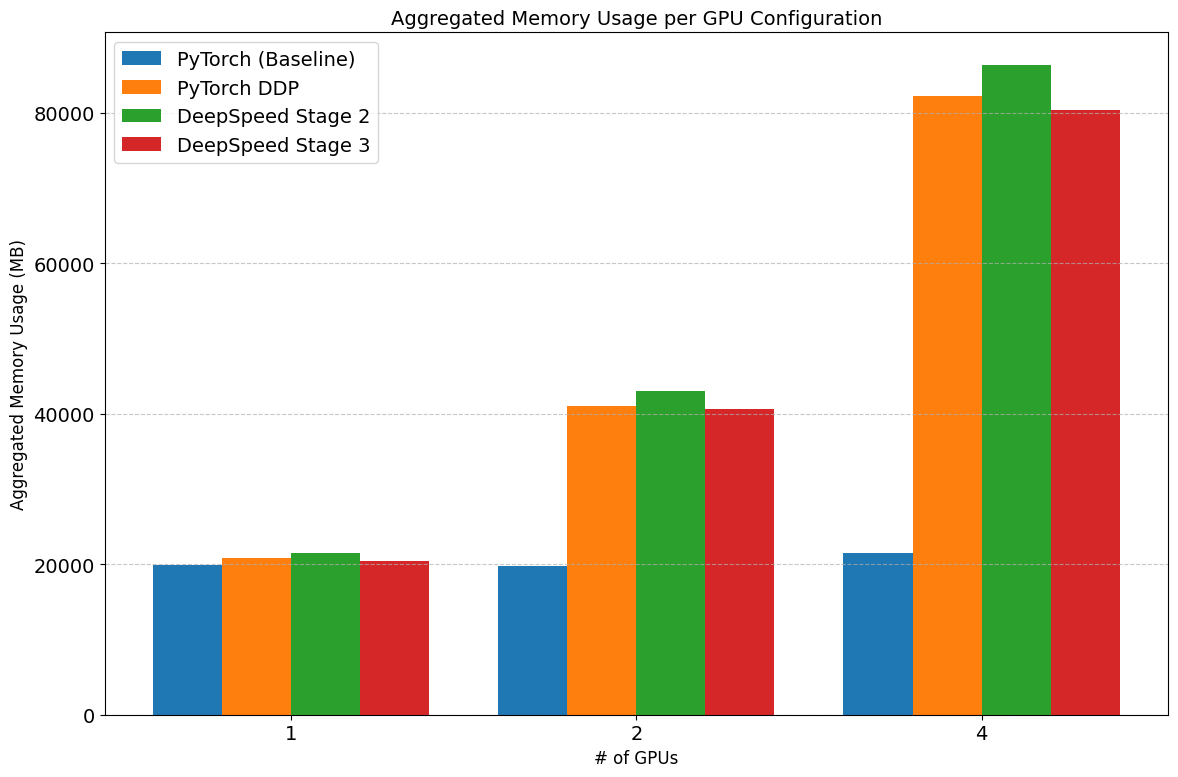

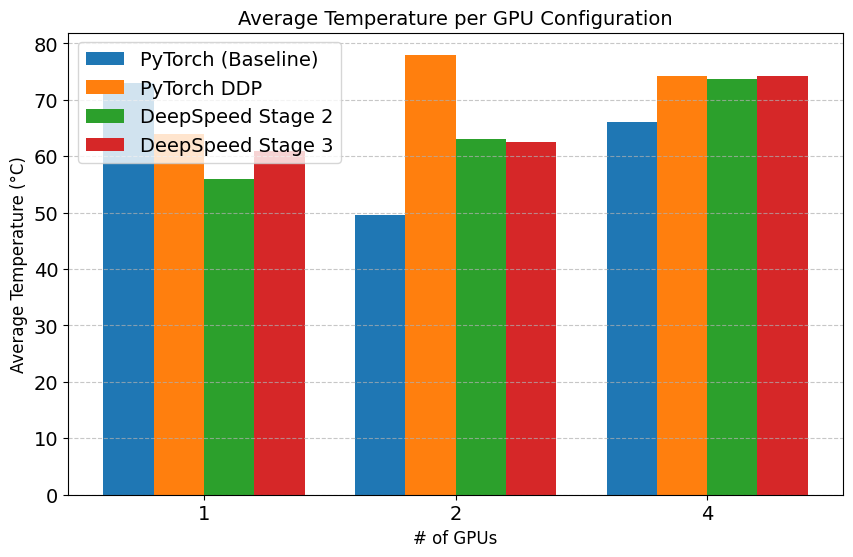

In [46]:
# Data extracted from the provided table
# Memory usage (MB) for different setups
memory_usage = {
    "PyTorch (Baseline)": [[19955], [11571, 8129], [7919, 4529, 4529, 4529]],
    "PyTorch DDP": [[20769], [20555, 20543], [20555, 20543, 20543, 20543]],
    "DeepSpeed Stage 2": [[21555], [21515, 21489], [21885, 21501, 21503, 21487]],
    "DeepSpeed Stage 3": [[20369], [20345, 20333], [20115, 20103, 20103, 20103]],
}

# Temperature (°C) for different setups
temperature = {
    "PyTorch (Baseline)": [[73.0], [49.0, 50.0], [76.0, 63.0, 61.0, 64.0]],
    "PyTorch DDP": [[64.0], [78.0, 78.0], [75.0, 72.0, 74.0, 76.0]],
    "DeepSpeed Stage 2": [[56.0], [59.0, 67.0], [70.0, 76.0, 76.0, 73.0]],
    "DeepSpeed Stage 3": [[61.0], [58.0, 67.0], [70.0, 75.0, 77.0, 75.0]],
}

# Memory Usage Visualization
# Plot memory usage for different configurations in bar chart
# Sum of memory usage for all GPUs in each configuration
memory_aggregated = {label: [sum(gpu_memory) for gpu_memory in data] for label, data in memory_usage.items()}

# X-axis labels for different number of GPUs
x_labels = [1, 2, 4]

plt.rcParams.update({'font.size': 14})

# Bar width for grouped bar chart
bar_width = 0.2
x_positions = np.arange(len(x_labels))

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
for idx, (label, data) in enumerate(memory_aggregated.items()):
    plt.bar(x_positions + idx * bar_width, data, bar_width, label=label)

# Adding labels and legend
plt.xlabel("# of GPUs", fontsize=12)
plt.ylabel("Aggregated Memory Usage (MB)", fontsize=12)
plt.title("Aggregated Memory Usage per GPU Configuration", fontsize=14)
plt.xticks(x_positions + bar_width * (len(memory_aggregated) - 1) / 2, x_labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

plt.rcParams.update({'font.size': 14})
# Temperature Visualization
# Plot temperature for different configurations in bar chart
# Average temperature for all GPUs in each configuration
temperature_averaged = {label: [np.mean(gpu_temp) for gpu_temp in data] for label, data in temperature.items()}
x_labels = [1, 2, 4]

plt.figure(figsize=(10, 6))
for idx, (label, data) in enumerate(temperature_averaged.items()):
    plt.bar(x_positions + idx * bar_width, data, bar_width, label=label)
plt.xlabel("# of GPUs", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.title("Average Temperature per GPU Configuration", fontsize=14)
plt.xticks(x_positions + bar_width * (len(temperature_averaged) - 1) / 2, x_labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()






In [45]:
# Load GPT-2 model and count the number of parameters and trainable parameters
import torch
from transformers import GPT2Model

# Load the GPT-2 model
model = GPT2Model.from_pretrained('gpt2')

# Count the total number of parameters
total_params = sum(p.numel() for p in model.parameters())
print(f'Total number of parameters in GPT-2 model: {total_params}')

# Count the total number of trainable parameters
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of trainable parameters in GPT-2 model: {total_trainable_params}')

# Destroy model to save memory
del model

Total number of parameters in GPT-2 model: 124439808
Total number of trainable parameters in GPT-2 model: 124439808
